In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import mnist

from keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam, RMSprop, Adadelta, schedules
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, PReLU, Dense, Dropout, Activation, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler

from keras.utils import np_utils
from tensorflow.keras import regularizers as lg


In [ ]:
# load dataset from dataset.mnist
# 60000 for training, 10000 for test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Text(0.5, 1.0, 'Class 5')

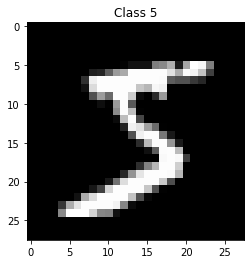

In [ ]:
# Polit a grayscale image with the label
plt.imshow(X_train[0], cmap='gray')
plt.title("Class " + str(y_train[0]))

In [ ]:
# Tensorflow can handle fromat: (batch, height, width, channel)
features_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
features_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

features_train = features_train.astype('float32')
features_test = features_test.astype('float32')

In [ ]:
# very similar to min-max normalization: we transform the values within the range [0,1]
features_test /= 255
features_train /= 255

In [ ]:
# we have 10 output classes we want to end up with one-hot-encoding
# as we have seen for the Iris-dataset
targets_train = np_utils.to_categorical(y_train, 10)
targets_test = np_utils.to_categorical(y_test, 10)

In [ ]:
features_train, features_val, targets_train, targets_val = train_test_split(features_train, targets_train, test_size=0.2)

In [ ]:
model = Sequential()


model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding = 'same',
                 activation = 'ReLU', kernel_initializer='he_uniform'))
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding = 'same',
                 activation = 'ReLU', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform',
                 activation = 'ReLU'))
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding = 'same',
                 activation = 'ReLU'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), kernel_initializer='he_uniform', padding = 'same',
                 activation = 'ReLU'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

#flattening layer
model.add(Flatten())

# fully connected layer

model.add(Dense(256, activation = 'ReLU', kernel_regularizer=lg.l2(0.0001),
                activity_regularizer=lg.l2(1e-5)))
model.add(BatchNormalization())
#model.add(Dropout(0.1))


model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       3

In [1]:
plot_model(model, to_file='summary.png', show_shapes=True, show_layer_names=True)

NameError: ignored

In [ ]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 10)

checkpoint = ModelCheckpoint(
    filepath='./model/checkpoint.{epoch:02d}.hdf5',
    monitor = 'val_loss',
    mode = 'min',
    verbose = 1,
    save_best_only=True,
    save_freq='epoch')

lr_decayed_fn = (schedules.CosineDecayRestarts(
      initial_learning_rate=0.001, 
      first_decay_steps=500,
      t_mul=2.0, 
      m_mul = 0.8, name =None))


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=lr_decayed_fn),
              metrics=['accuracy'])

hist = model.fit(features_train, batch_size=64, epochs=20,
          validation_data=(features_val), verbose=1,
          callbacks = [es, checkpoint])

Epoch 1/20
750/750 [==============================] - ETA: 0s - loss: 0.2718 - accuracy: 0.9390
Epoch 00001: val_loss improved from inf to 0.16875, saving model to ./model/checkpoint.01.hdf5
750/750 [==============================] - 53s 29ms/step - loss: 0.2718 - accuracy: 0.9390 - val_loss: 0.1687 - val_accuracy: 0.9718
Epoch 2/20
750/750 [==============================] - ETA: 0s - loss: 0.1436 - accuracy: 0.9779
Epoch 00002: val_loss improved from 0.16875 to 0.11620, saving model to ./model/checkpoint.02.hdf5
750/750 [==============================] - 21s 28ms/step - loss: 0.1436 - accuracy: 0.9779 - val_loss: 0.1162 - val_accuracy: 0.9863
Epoch 3/20
750/750 [==============================] - ETA: 0s - loss: 0.1374 - accuracy: 0.9790
Epoch 00003: val_loss did not improve from 0.11620
750/750 [==============================] - 21s 28ms/step - loss: 0.1374 - accuracy: 0.9790 - val_loss: 0.1272 - val_accuracy: 0.9847
Epoch 4/20
750/750 [==============================] - ETA: 0s - loss

In [ ]:
def acc_loss_plot(hist):
    
    fit, loss_ax = plt.subplots(figsize=(20, 10))
    acc_ax = loss_ax.twinx()
    loss_ax.plot(hist.history["loss"], "y", label="train_loss")
    loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
    loss_ax.set_xlabel("Epoch")
    loss_ax.set_ylabel("Loss")
    loss_ax.legend(loc = "upper left")
    
    acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")
    acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")
    acc_ax.set_ylabel("Accuracy")
    acc_ax.legend(loc = "center left")
    
    plt.show()

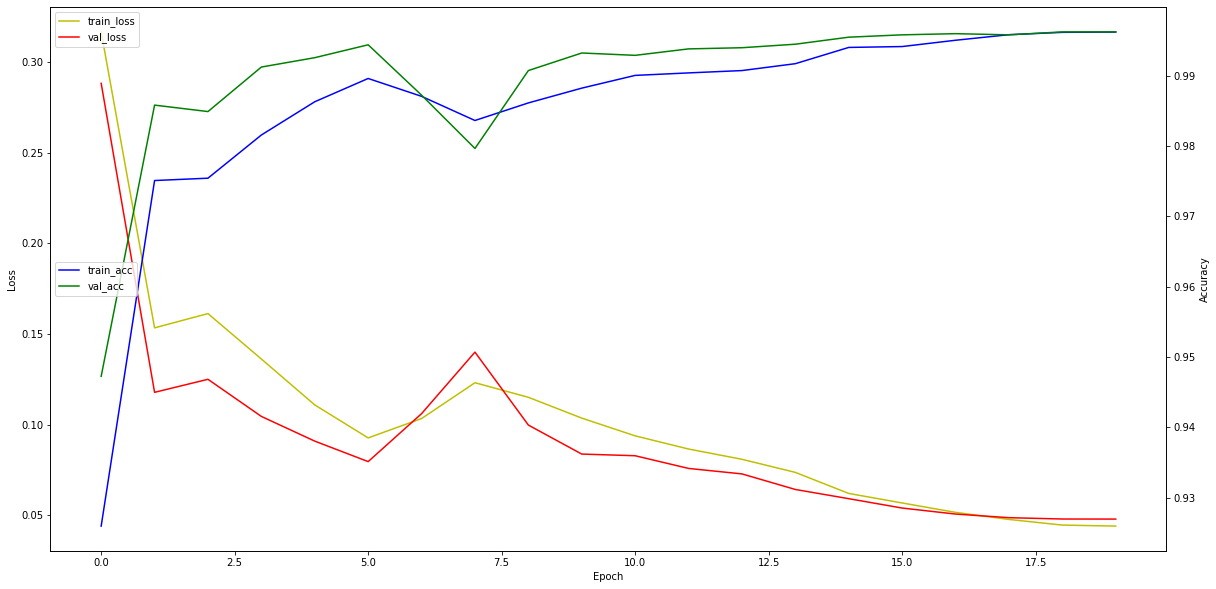

In [ ]:
acc_loss_plot(hist)

In [ ]:
callback_model = load_model('/content/model/checkpoint.20.hdf5')

score = callback_model.evaluate(features_test, targets_test)
print("test accuracy: %.4f" % score[1])

313/313 [==============================] - 3s 8ms/step - loss: 0.0500 - accuracy: 0.9954
test accuracy: 0.9954
